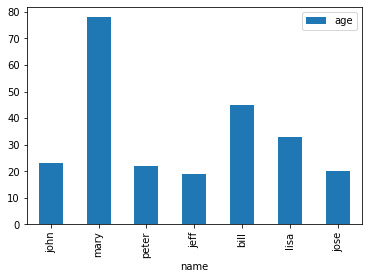

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

# a simple line plot
df.plot(kind='bar',x='name',y='age')
plt.show()

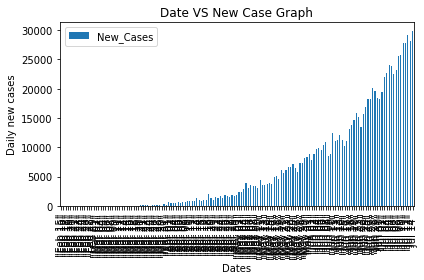

In [2]:
import json
from bs4 import BeautifulSoup
import requests
import pandas
import matplotlib.pyplot as plt

req=requests.get("https://www.worldometers.info/coronavirus/country/india/")
#req.status_code
data= req.content
soup=BeautifulSoup(data,"html.parser")
#print(soup.prettify())
total=soup.find_all("div",class_="col-md-12")[1].find("script").text
dates=(total.split("categories: [")[1].split("]        }")[0].split(","))
#dates
cases=total.split("data: [")[1].split("]            }")[0].split(",")
#cases
dailygdata=[]
for i,j in zip(dates,cases):
    if j=="null":
        dailygdata.append([i,0])  
    else:   
        dailygdata.append([i,int(j)])
 
df=pandas.DataFrame(dailygdata,columns=["Dates","New_Cases"])

df.plot(kind="bar",x="Dates",y="New_Cases")
plt.xlabel('Dates')
plt.ylabel('Daily new cases')
plt.title('Date VS New Case Graph')

plt.legend()

plt.rcParams['figure.figsize']=[800,500]

plt.tight_layout()

#plt.savefig('plot.png')

plt.show()
#df